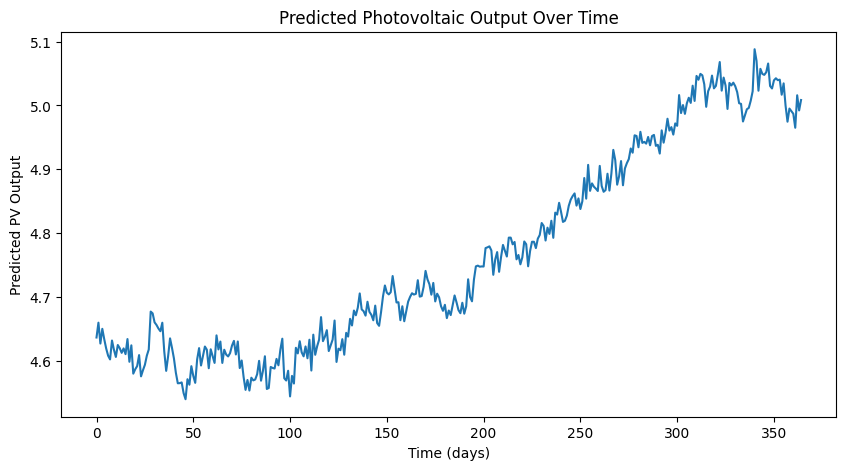

In [5]:
import aggregating_preprocessing.preprocessing_predictions as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


# Preprocess all the data for the location requested
# Fetch the data from the EU API. Default lat and lon are for Le Wagon Berlin - we can make them dynamic

def preprocessing_data(lat=52.506971, lon=13.391474):
    result = preprocessing.fetch_data(lat=lat, lon=lon)
    df = preprocessing.convert_data(result)
    aggregated_df = preprocessing.aggregate_data(df)
    preprocessed_df = preprocessing.preprocess_data(aggregated_df)

    # Create lewagon_X with the first 730 rows
    lewagon_X = preprocessed_df.iloc[:730].copy()

    # Create lewagon_y with the last 365 rows, only the 'pv_output' column
    lewagon_y = preprocessed_df.iloc[-365:][['pv_output']].copy()

    # Reshape lewagon_X and lewagon_y to the shape (samples, timesteps, features)
    lewagon_X_reshaped = lewagon_X.values.reshape((1, 730, lewagon_X.shape[1]))
    lewagon_y_reshaped = lewagon_y.values.reshape((1, 365, lewagon_y.shape[1]))

    return lewagon_X_reshaped, lewagon_y_reshaped

#lewagon_X_reshaped, lewagon_y_reshaped = preprocessing_data()
#print(lewagon_X_reshaped.shape, lewagon_y_reshaped.shape)

# Load the saved RNN model
def load_our_model():
    model = load_model('eu_RNN_model')
    return model

# Generate predictions for PV production
def predict(lewagon_X_reshaped, model):

    y_lewagon_pred = model.predict(lewagon_X_reshaped, verbose = 0)
    return y_lewagon_pred

# Visualize the predictions
def visualize(y_lewagon_pred):
    # Flatten the predictions to 1D (if necessary)
    y_lewagon_pred_flat = y_lewagon_pred.flatten()

    # Create an index for the x-axis
    x = range(len(y_lewagon_pred_flat))

    # Plot the predictions
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=x, y=y_lewagon_pred_flat)
    plt.xlabel("Time (days)")
    plt.ylabel("Predicted PV Output")
    plt.title("Predicted Photovoltaic Output Over Time")
    plt.show()

# Run the whole process
def predict_on_website(lat=52.506971, lon=13.391474):
    lewagon_X_reshaped, lewagon_y_reshaped = preprocessing_data(lat=lat, lon=lon)
    model = load_our_model()
    y_lewagon_pred = predict(lewagon_X_reshaped, model)
    line_graph = visualize(y_lewagon_pred)
    return line_graph

our_line_graph = predict_on_website()
our_line_graph